# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_methods'
time_path = 'data/time/compare_methods_2020_12_14_1_4_52.npy'
cost_path = 'data/cost/compare_methods_2020_12_14_1_4_52.npy'
methods = ['greedy', 'optimal', 'approx', 'approx_woc']
sizes = np.arange(1, 11)
repeats = 10

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(40,) (40,)
Wall time: 2 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10, 6), columns=methods)
print(df_time.shape)
print(df_time.info())
display(df_time)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   optimal     10 non-null     float64
 2   approx      10 non-null     float64
 3   approx_woc  10 non-null     float64
dtypes: float64(4)
memory usage: 448.0 bytes
None


,greedy,optimal,approx,approx_woc
0,0.000000,39.972292,0.777624,0.066177
1,0.000000,43.826830,0.713174,0.078114
2,0.000097,41.751241,0.678946,0.070615
3,0.000000,43.381225,0.703977,0.094355
4,0.000000,46.299124,0.754335,0.096643
5,0.000097,45.003437,0.686456,0.083131
6,0.000198,43.027262,0.682173,0.066935
7,0.000100,41.444201,0.683003,0.089269
8,0.000100,41.509849,0.667716,0.105167
9,0.000100,42.606138,0.695376,0.083485


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   optimal     10 non-null     float64
 2   approx      10 non-null     float64
 3   approx_woc  10 non-null     float64
dtypes: float64(4)
memory usage: 448.0 bytes
None


,greedy,optimal,approx,approx_woc
0,10795.6,8721.6,8874.3,9189.9
1,11359.4,9146.3,9420.8,9681.6
2,11255.3,8897.2,9140.8,9549.1
3,11081.1,8792.6,9164.7,9313.7
4,12207.9,9404.4,9810.7,10084.4
5,11394.7,8867.0,9257.6,9454.2
6,10975.9,8869.2,8984.8,9509.9
7,11213.4,8945.1,9320.2,9398.4
8,11452.0,8935.7,9263.2,9472.4
9,10550.6,8223.8,8473.3,8857.8


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy         0.000069
optimal       42.882160
approx         0.704278
approx_woc     0.083389
dtype: float64

## Approximation ratio

In [7]:
df_cost.loc[:, 'approx_ratio'] = df_cost['approx']/df_cost['optimal']
df_cost.loc[:, 'approx_woc_ratio'] = df_cost['approx_woc']/df_cost['optimal']
df_cost.loc[:, 'greedy_ratio'] = df_cost['greedy']/df_cost['optimal']
display(df_cost)

,greedy,optimal,approx,approx_woc,approx_ratio,approx_woc_ratio,greedy_ratio
0,10795.6,8721.6,8874.3,9189.9,1.017508,1.053694,1.237800
1,11359.4,9146.3,9420.8,9681.6,1.030012,1.058526,1.241967
2,11255.3,8897.2,9140.8,9549.1,1.027379,1.073270,1.265038
3,11081.1,8792.6,9164.7,9313.7,1.042320,1.059266,1.260276
4,12207.9,9404.4,9810.7,10084.4,1.043203,1.072307,1.298105
5,11394.7,8867.0,9257.6,9454.2,1.044051,1.066223,1.285068
6,10975.9,8869.2,8984.8,9509.9,1.013034,1.072239,1.237530
7,11213.4,8945.1,9320.2,9398.4,1.041934,1.050676,1.253580
8,11452.0,8935.7,9263.2,9472.4,1.036651,1.060062,1.281601
9,10550.6,8223.8,8473.3,8857.8,1.030339,1.077093,1.282935


In [8]:
df_cost[['approx_ratio', 'approx_woc_ratio', 'greedy_ratio']].mean()

approx_ratio        1.032643
approx_woc_ratio    1.064336
greedy_ratio        1.264390
dtype: float64

## Ride-sharing efficiency

In [9]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
df_cost.loc[:, 'optimal_gain'] = df_cost['greedy']/df_cost['optimal']
display(df_cost)

,greedy,optimal,approx,approx_woc,approx_ratio,approx_woc_ratio,greedy_ratio,approx_gain,approx_woc_gain,optimal_gain
0,10795.6,8721.6,8874.3,9189.9,1.017508,1.053694,1.237800,1.216502,1.174724,1.237800
1,11359.4,9146.3,9420.8,9681.6,1.030012,1.058526,1.241967,1.205779,1.173298,1.241967
2,11255.3,8897.2,9140.8,9549.1,1.027379,1.073270,1.265038,1.231325,1.178677,1.265038
3,11081.1,8792.6,9164.7,9313.7,1.042320,1.059266,1.260276,1.209107,1.189763,1.260276
4,12207.9,9404.4,9810.7,10084.4,1.043203,1.072307,1.298105,1.244345,1.210573,1.298105
5,11394.7,8867.0,9257.6,9454.2,1.044051,1.066223,1.285068,1.230848,1.205253,1.285068
6,10975.9,8869.2,8984.8,9509.9,1.013034,1.072239,1.237530,1.221608,1.154155,1.237530
7,11213.4,8945.1,9320.2,9398.4,1.041934,1.050676,1.253580,1.203129,1.193118,1.253580
8,11452.0,8935.7,9263.2,9472.4,1.036651,1.060062,1.281601,1.236290,1.208986,1.281601
9,10550.6,8223.8,8473.3,8857.8,1.030339,1.077093,1.282935,1.245158,1.191108,1.282935


In [10]:
df_cost[['approx_gain', 'approx_woc_gain', 'optimal_gain']].mean()

approx_gain        1.224409
approx_woc_gain    1.187966
optimal_gain       1.264390
dtype: float64

In [11]:
df_cost[['greedy', 'optimal', 'approx', 'approx_woc']].mean()

greedy        11228.59
optimal        8880.29
approx         9171.04
approx_woc     9451.14
dtype: float64

# Plots

## Processing time

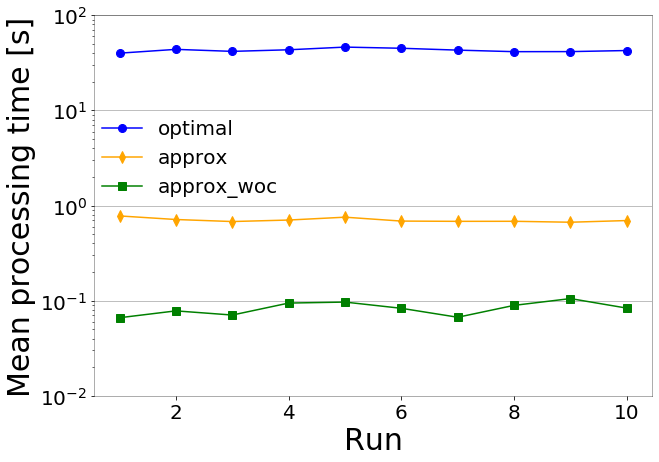

In [12]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-2, 10**2),
    plot_optimal=True
)

## Travel cost

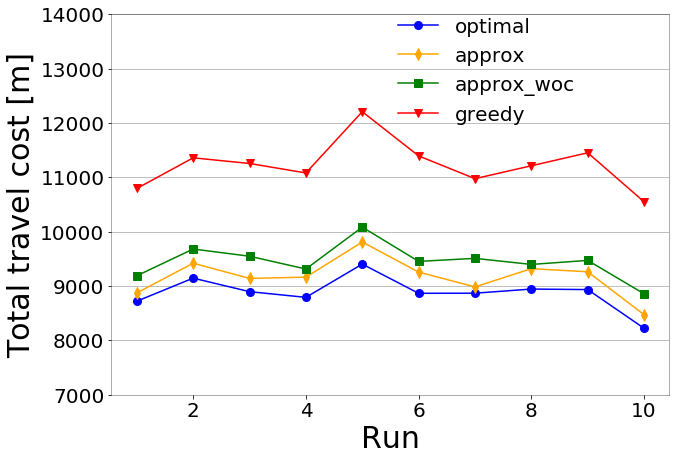

In [13]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(7000,14000),
    plot_optimal=True
)

## Approximation ratio

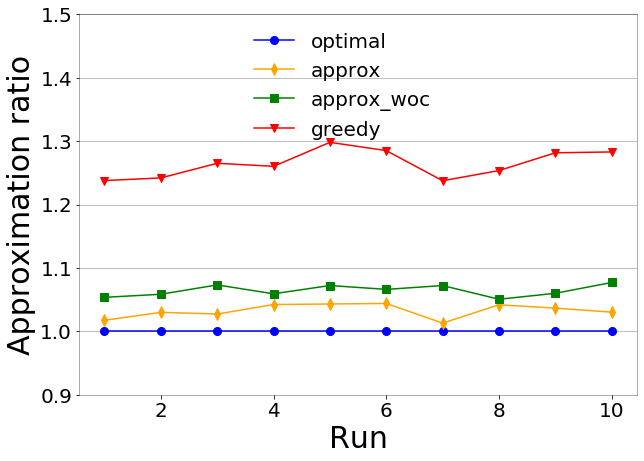

In [14]:
plot_approx_ratio(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(0.9,1.5),
    legend_loc=(0.3, 0.65)
)

## Ride-sharing efficiency

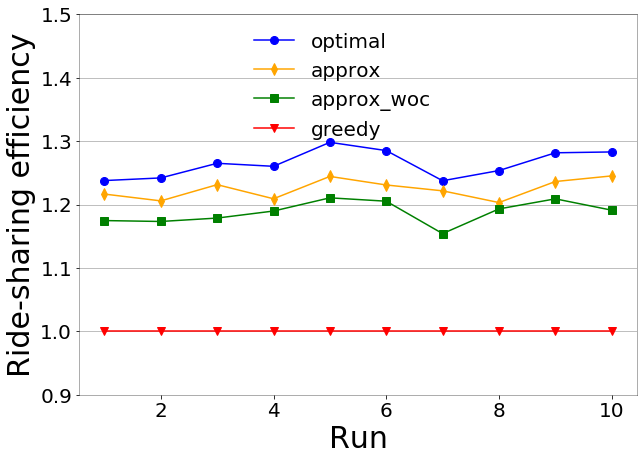

In [15]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(0.9,1.5),
    plot_optimal=True,
    legend_loc=(0.3, 0.65)
)